In [4]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 gym-anytrading gym stable-baselines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 6.6 kB/s 
     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 503 kB 54.4 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 3.8 MB 45.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=0dbf729869ec76dab5355dca22263138483f10c93e51e0106ee2fb471746b5f9
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
     

In [1]:
import gym_anytrading
import gym

from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# Import Google Data downloaded from yfinance

In [2]:
df = pd.read_csv('GOOG_data.csv')

In [4]:
df ['Date'] = pd.to_datetime(df ['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4508 entries, 2004-08-19 to 2022-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4508 non-null   float64
 1   Low        4508 non-null   float64
 2   Open       4508 non-null   float64
 3   Close      4508 non-null   float64
 4   Volume     4508 non-null   float64
 5   Adj Close  4508 non-null   float64
dtypes: float64(6)
memory usage: 246.5 KB


In [6]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)

In [7]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break

info {'total_reward': 2.181816101074233, 'total_profit': 0.9216812235198812, 'position': 1}


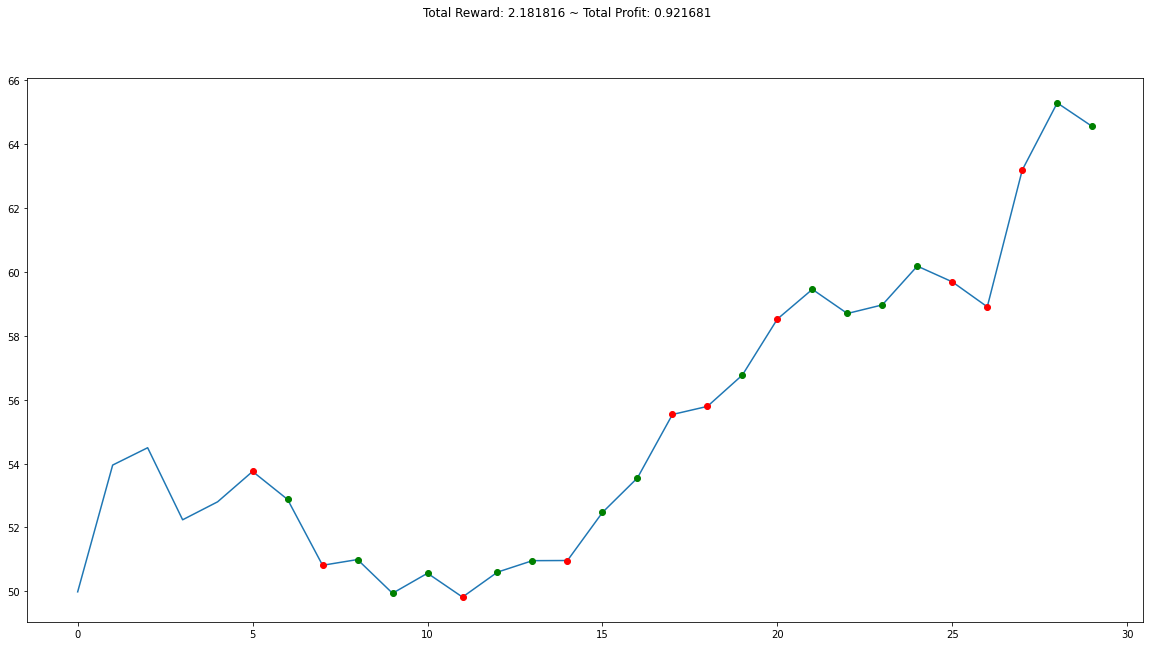

In [8]:
plt.figure(figsize=(20,10))
plt.cla()
env.render_all()
plt.show()

In [9]:
env_build = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)
env = DummyVecEnv([env_build])

In [ ]:
model_train = A2C('MlpLstmPolicy', env, verbose=1) 
model_train.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.362   |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.026    |
---------------------------------
---------------------------------
| explained_variance | -0.0149  |
| fps                | 342      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.41     |
---------------------------------
----------------------------------
| explained_variance | -0.000765 |
| fps                | 378   

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(25,35), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_train.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()